In [34]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [36]:
import geopandas as gpd
import matplotlib.pyplot as plt

### 경남 노인 인구 분포- 거제

In [97]:
gdf = gpd.read_file(
    "../data/경남 노인 인구 분포/거제시/nlsp_021001010.shp", 
    encoding="utf-8", 
    )
gdf['val'] = gdf['val'].fillna(0)
gdf = gdf.to_crs(epsg=5179)


In [98]:
gdf

,gid,lbl,val,geometry
0,마라081595,N/A,0.0,"POLYGON ((1108100 1659500, 1108100 1659600, 11..."
1,마라024556,N/A,0.0,"POLYGON ((1102400 1655600, 1102400 1655700, 11..."
2,라라895518,N/A,0.0,"POLYGON ((1089500 1651800, 1089500 1651900, 10..."
3,마라070582,N/A,0.0,"POLYGON ((1107000 1658200, 1107000 1658300, 11..."
4,마라008419,7.00,7.0,"POLYGON ((1100800 1641900, 1100800 1642000, 11..."
...,...,...,...,...
43010,라라933589,None,0.0,"POLYGON ((1093300 1658900, 1093300 1659000, 10..."
43011,마라008524,None,0.0,"POLYGON ((1100800 1652400, 1100800 1652500, 11..."
43012,라라889535,None,0.0,"POLYGON ((1088900 1653500, 1088900 1653600, 10..."
43013,마라022407,None,0.0,"POLYGON ((1102200 1640700, 1102200 1640800, 11..."


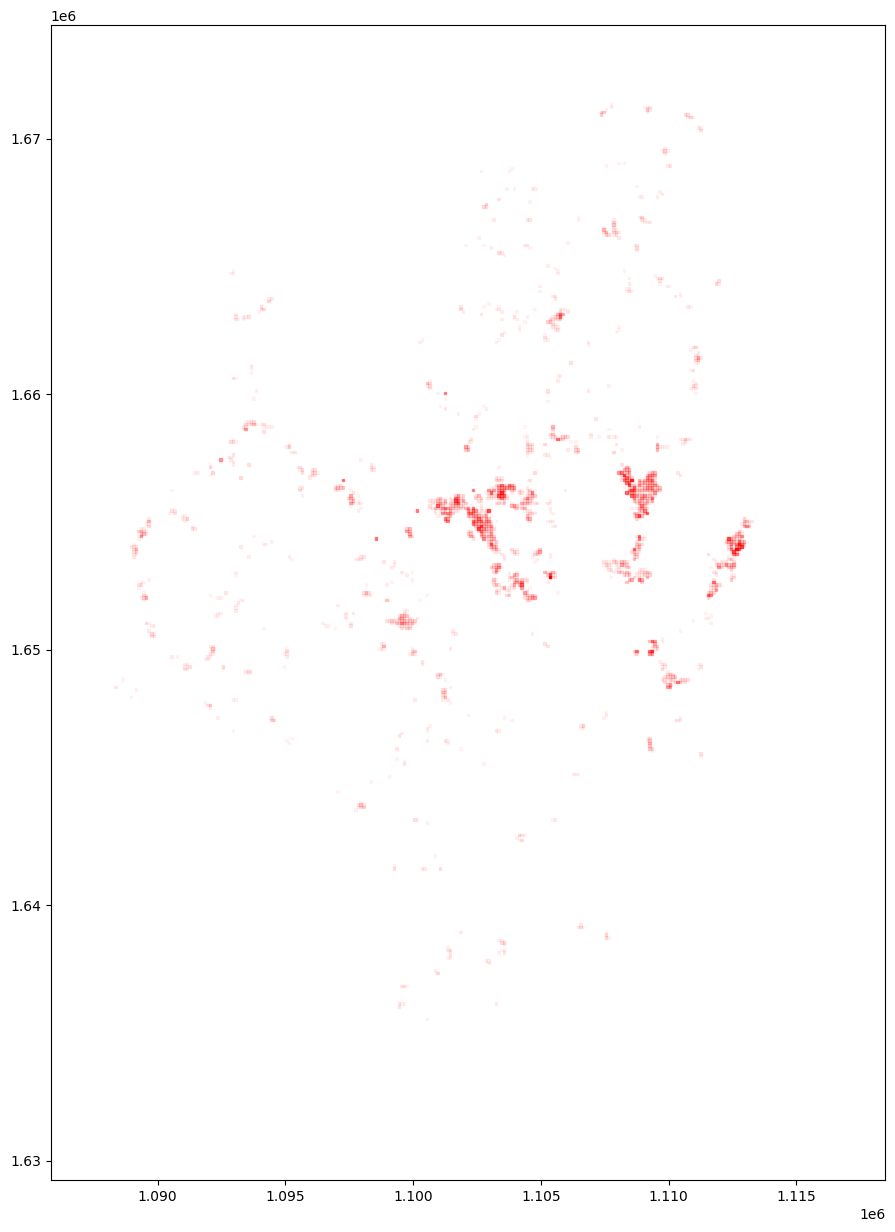

In [112]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

norm = Normalize(vmin=gdf['val'].min(), vmax=gdf['val'].max())

ax = gdf.plot(
    figsize = (20, 15), 
    color = "red",
    alpha = norm(gdf['val']),
    edgecolor = "red", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)
plt.show()

### 경남 지도- 거제

In [108]:
emd_geo = gpd.read_file(
    "../data/emd_20230729/emd.shp", 
    encoding="cp949", 
    )
# Geoje = ["거제면", "남부면", "동부면", "둔덕면", "사등면", "연초면", "일운면", "장목면", "하청면", "고현동",
#             "상문", "수양", "장평동", "능포동", "아주동", "옥포","장승포동"]
# emd_geo = gpd.GeoDataFrame()
# for Geo in Geoje:
#    filtered_geo = emd[emd["EMD_KOR_NM"].apply(lambda x: True if Geo in x else False)]
#    emd_geo = pd.concat([emd_geo, filtered_geo])
emd_geo = emd_geo[emd_geo["EMD_CD"].apply(lambda x: x[:5] == "48310")]

emd_geo = emd_geo.set_crs(crs="EPSG:5179")

In [109]:
emd_geo

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
4519,48310101,Neungpo-dong,능포동,"POLYGON ((1112894.743 1655536.685, 1112894.742..."
4520,48310102,Jangseungpo-dong,장승포동,"POLYGON ((1111936.694 1653127.037, 1111939.297..."
4521,48310103,Dumo-dong,두모동,"POLYGON ((1111981.722 1655349.533, 1112055.728..."
4522,48310104,Ayang-dong,아양동,"POLYGON ((1110135.749 1654511.835, 1110124.213..."
4523,48310105,Aju-dong,아주동,"POLYGON ((1109323.109 1654658.302, 1109322.421..."
4524,48310106,Okpo-dong,옥포동,"POLYGON ((1109298.816 1655644.249, 1109294.053..."
4525,48310107,Deokpo-dong,덕포동,"POLYGON ((1109396.562 1659468.004, 1109416.543..."
4526,48310108,Jangpyeong-dong,장평동,"MULTIPOLYGON (((1098956.701 1658027.983, 10989..."
4527,48310109,Gohyeon-dong,고현동,"POLYGON ((1102642.918 1656213.534, 1102643.445..."
4528,48310110,Sangdong-dong,상동동,"POLYGON ((1104409.312 1654387.886, 1104424.679..."


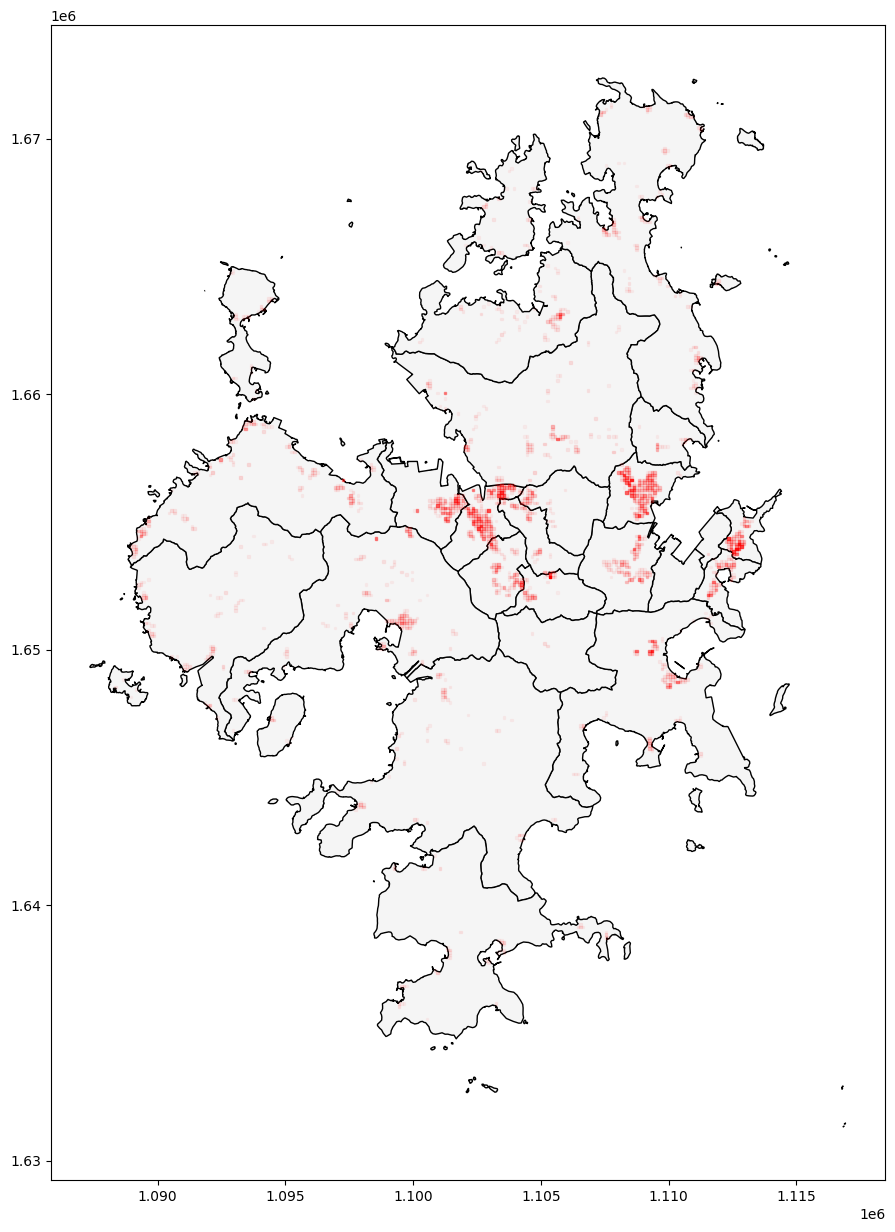

In [113]:
ax = emd_geo.plot(
    figsize = (20, 15), 
    color = "whitesmoke", 
    edgecolor = "black", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)
gdf.plot(
    ax=ax,
    figsize = (20, 15), 
    color = "red",
    alpha = norm(gdf['val']),
    edgecolor = "red", 
    linewidth = 1,
    column = "EMD_KOR_NM",
    legend = True, 
    categorical = True
)

plt.show()
